In [1]:
import pandas as pd

data = pd.read_csv("movie_metadata.csv")

In [2]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
# Lets check how many null values each column has

for col in data.columns:
    print(f"{col}: {(data[col].isna().sum()/len(data))*100}%")

color: 0.3767598651596272%
director_name: 2.062264525084275%
num_critic_for_reviews: 0.9914733293674401%
duration: 0.297441998810232%
director_facebook_likes: 2.062264525084275%
actor_3_facebook_likes: 0.4560777315090224%
actor_2_name: 0.2577830656355344%
actor_1_facebook_likes: 0.13880626611144162%
gross: 17.52924846321634%
genres: 0.0%
actor_1_name: 0.13880626611144162%
movie_title: 0.0%
num_voted_users: 0.0%
cast_total_facebook_likes: 0.0%
actor_3_name: 0.4560777315090224%
facenumber_in_poster: 0.2577830656355344%
plot_keywords: 3.0339083878643662%
movie_imdb_link: 0.0%
num_user_for_reviews: 0.41641879833432477%
language: 0.2379535990481856%
country: 0.099147332936744%
content_rating: 6.008328375966687%
budget: 9.75609756097561%
title_year: 2.1415823914336705%
actor_2_facebook_likes: 0.2577830656355344%
imdb_score: 0.0%
aspect_ratio: 6.523894507237755%
movie_facebook_likes: 0.0%


In [14]:
# Lets handle the null values

# Lest handle the columns one by one
data['color'].fillna(data['color'].mode()[0],inplace=True)

In [15]:
data['color'].isna().sum()

0

In [7]:
# Filter columns based on object type
object_columns = data.select_dtypes(include='object')

In [16]:
for obj_col in object_columns:
    object_columns[obj_col].fillna(object_columns[obj_col].mode()[0], inplace=True)
for obj_col in object_columns.columns:
    data[obj_col] = object_columns[obj_col]

c:\users\naman\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
object_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   color            5043 non-null   object
 1   director_name    5043 non-null   object
 2   actor_2_name     5043 non-null   object
 3   genres           5043 non-null   object
 4   actor_1_name     5043 non-null   object
 5   movie_title      5043 non-null   object
 6   actor_3_name     5043 non-null   object
 7   plot_keywords    5043 non-null   object
 8   movie_imdb_link  5043 non-null   object
 9   language         5043 non-null   object
 10  country          5043 non-null   object
 11  content_rating   5043 non-null   object
dtypes: object(12)
memory usage: 472.9+ KB


In [18]:
for col in data.columns:
    print(f"{col}: {(data[col].isna().sum()/len(data))*100}%")

color: 0.0%
director_name: 0.0%
num_critic_for_reviews: 0.9914733293674401%
duration: 0.297441998810232%
director_facebook_likes: 2.062264525084275%
actor_3_facebook_likes: 0.4560777315090224%
actor_2_name: 0.0%
actor_1_facebook_likes: 0.13880626611144162%
gross: 17.52924846321634%
genres: 0.0%
actor_1_name: 0.0%
movie_title: 0.0%
num_voted_users: 0.0%
cast_total_facebook_likes: 0.0%
actor_3_name: 0.0%
facenumber_in_poster: 0.2577830656355344%
plot_keywords: 0.0%
movie_imdb_link: 0.0%
num_user_for_reviews: 0.41641879833432477%
language: 0.0%
country: 0.0%
content_rating: 0.0%
budget: 9.75609756097561%
title_year: 2.1415823914336705%
actor_2_facebook_likes: 0.2577830656355344%
imdb_score: 0.0%
aspect_ratio: 6.523894507237755%
movie_facebook_likes: 0.0%


In [22]:
# Lets fill the numberic values with the median

number_df = data.select_dtypes(exclude='object')
for num_col in number_df:
    number_df[num_col].fillna(number_df[num_col].median(), inplace=True)
for num_col in number_df.columns:
    data[num_col] = number_df[num_col]

c:\users\naman\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\users\naman\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
c:\users\naman\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [23]:
for col in data.columns:
    print(f"{col}: {(data[col].isna().sum()/len(data))*100}%")

color: 0.0%
director_name: 0.0%
num_critic_for_reviews: 0.0%
duration: 0.0%
director_facebook_likes: 0.0%
actor_3_facebook_likes: 0.0%
actor_2_name: 0.0%
actor_1_facebook_likes: 0.0%
gross: 0.0%
genres: 0.0%
actor_1_name: 0.0%
movie_title: 0.0%
num_voted_users: 0.0%
cast_total_facebook_likes: 0.0%
actor_3_name: 0.0%
facenumber_in_poster: 0.0%
plot_keywords: 0.0%
movie_imdb_link: 0.0%
num_user_for_reviews: 0.0%
language: 0.0%
country: 0.0%
content_rating: 0.0%
budget: 0.0%
title_year: 0.0%
actor_2_facebook_likes: 0.0%
imdb_score: 0.0%
aspect_ratio: 0.0%
movie_facebook_likes: 0.0%


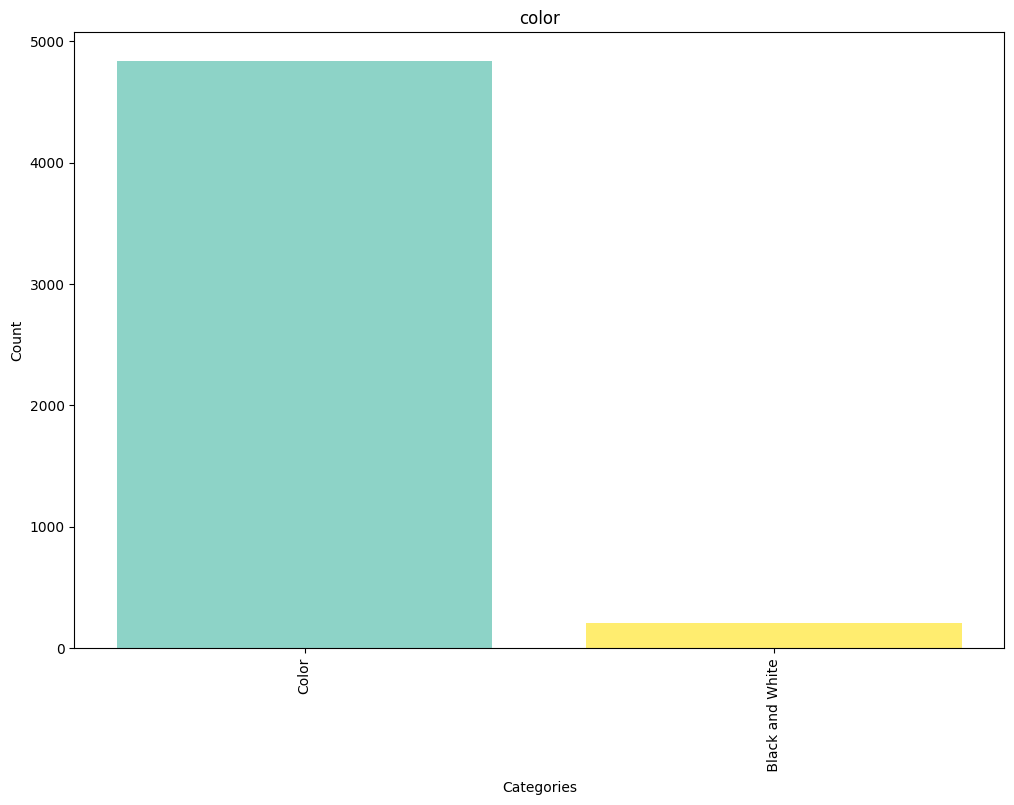

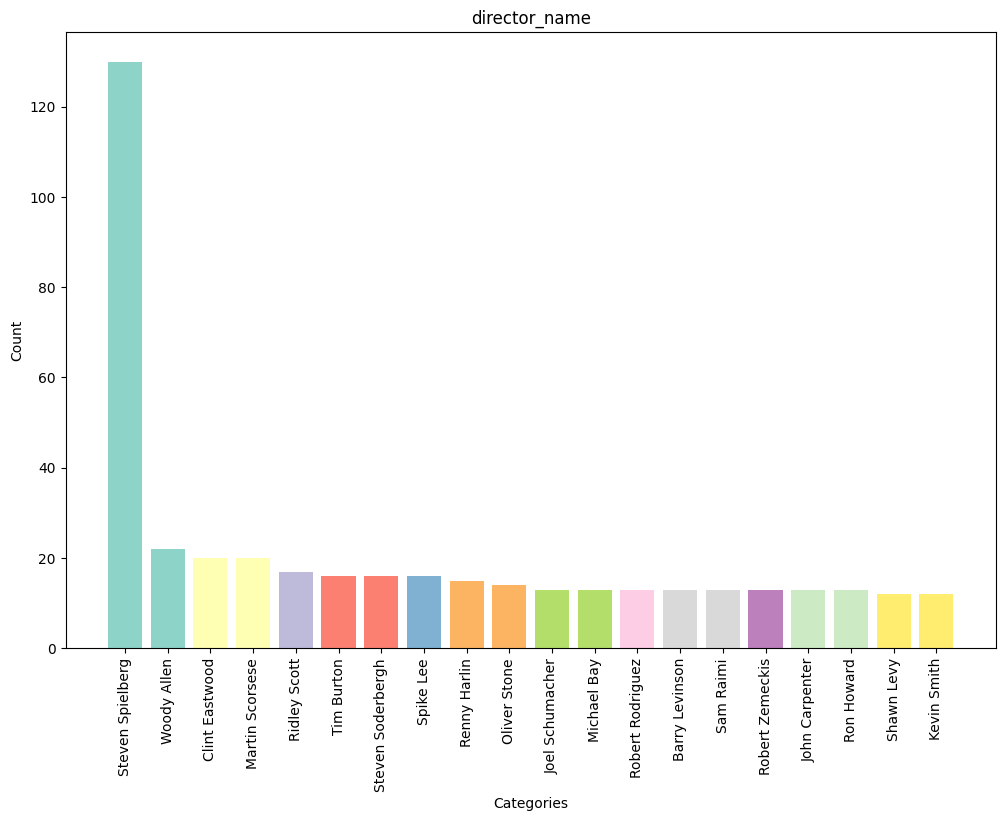

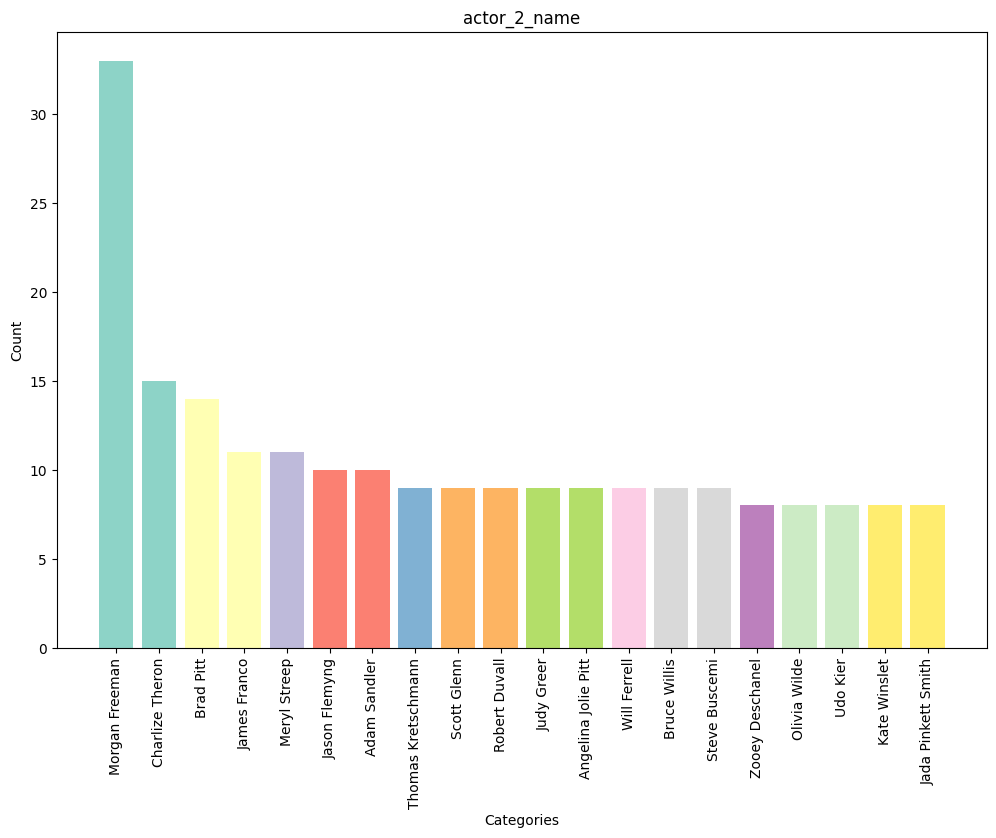

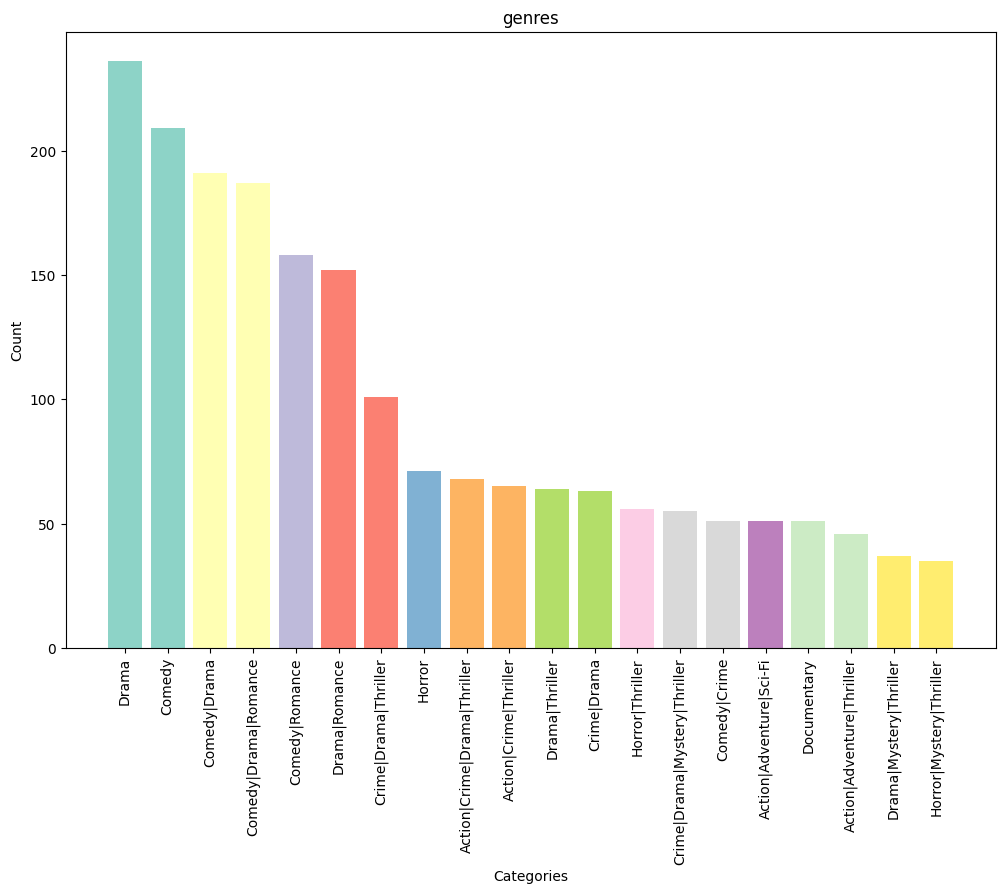

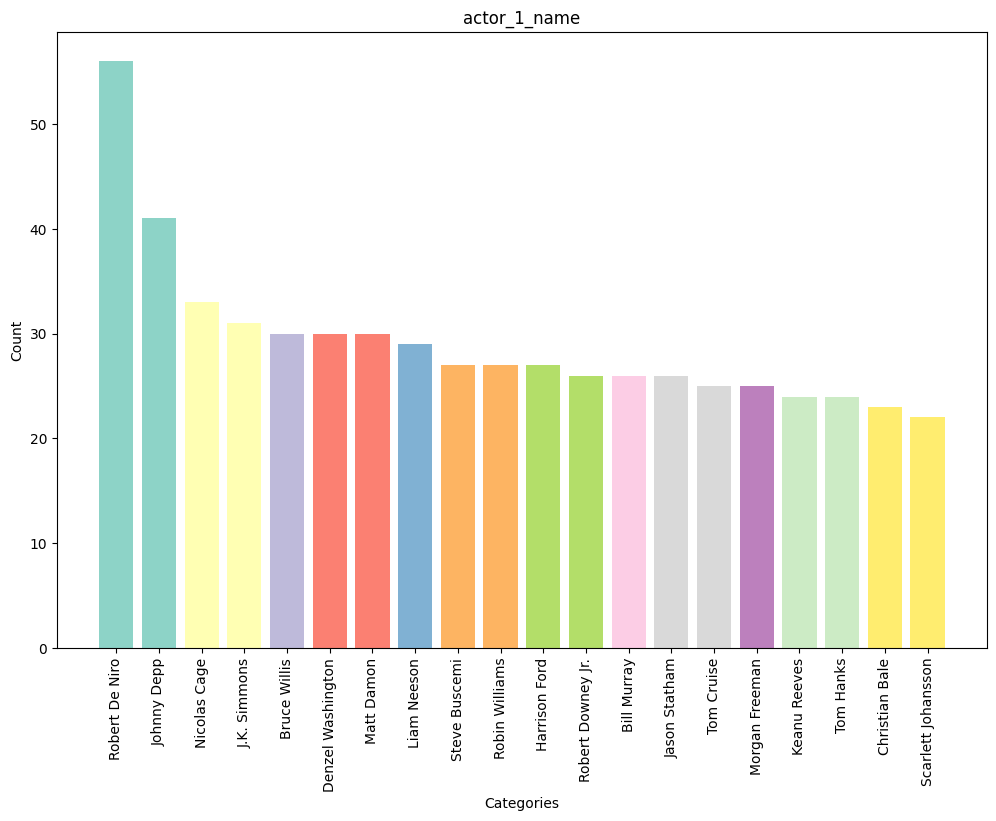

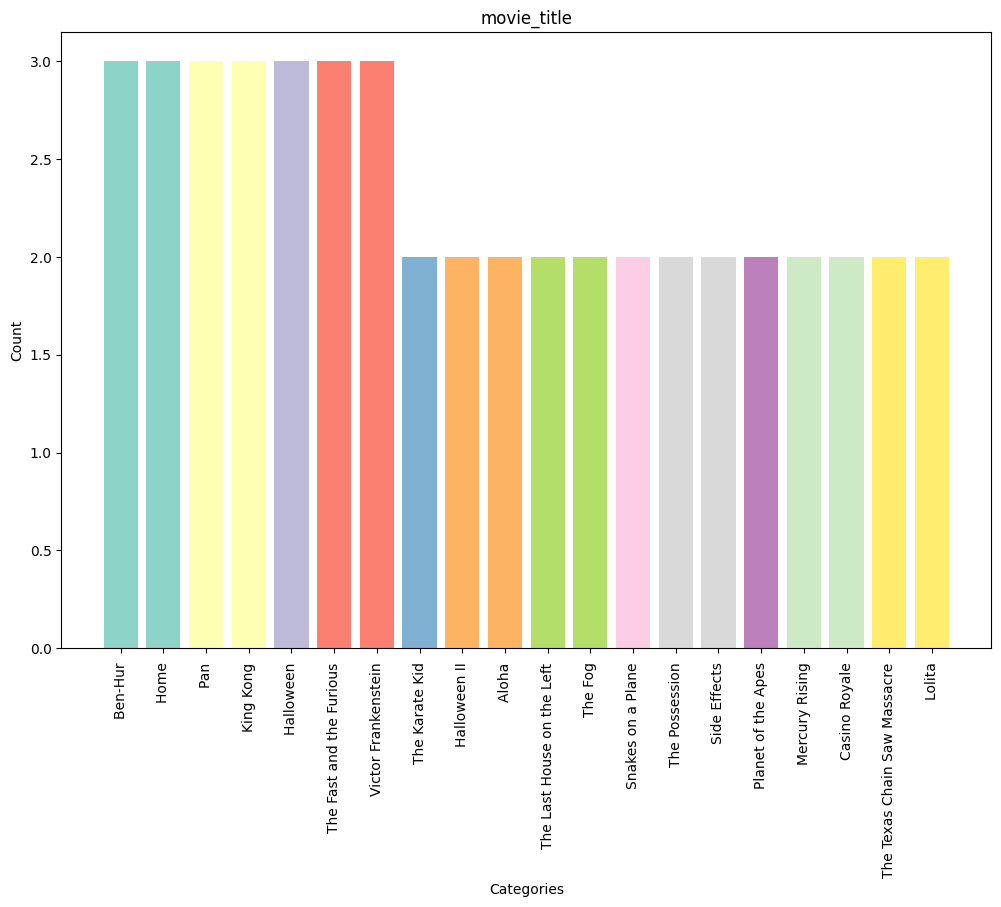

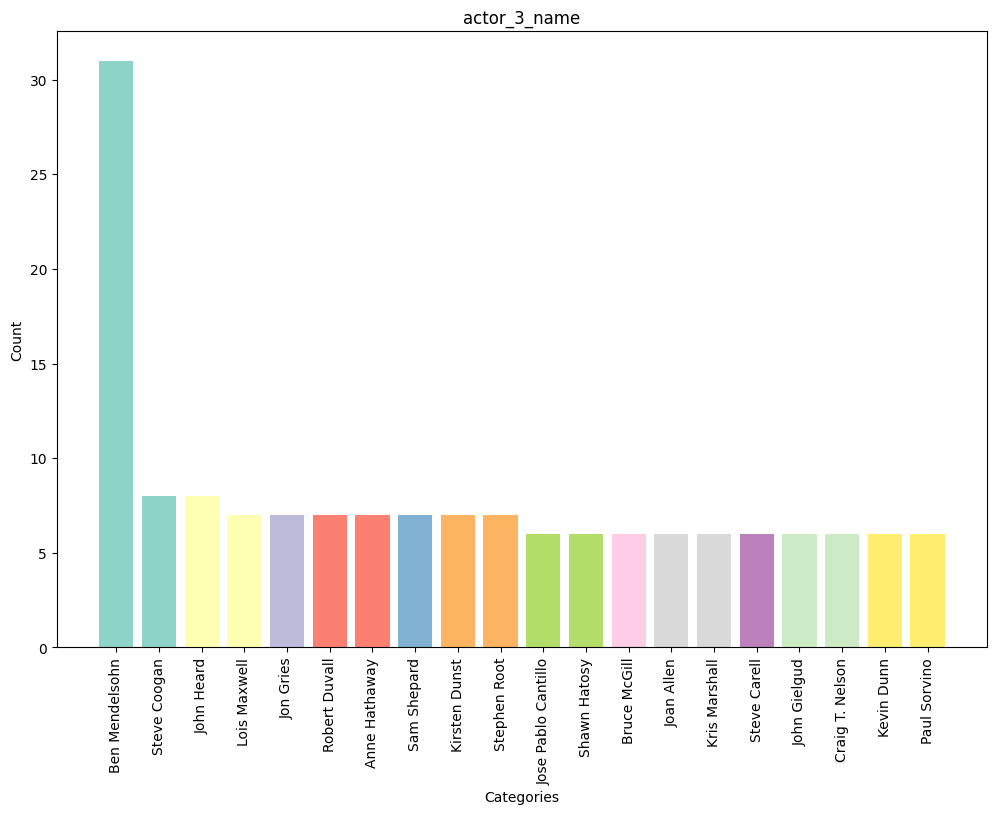

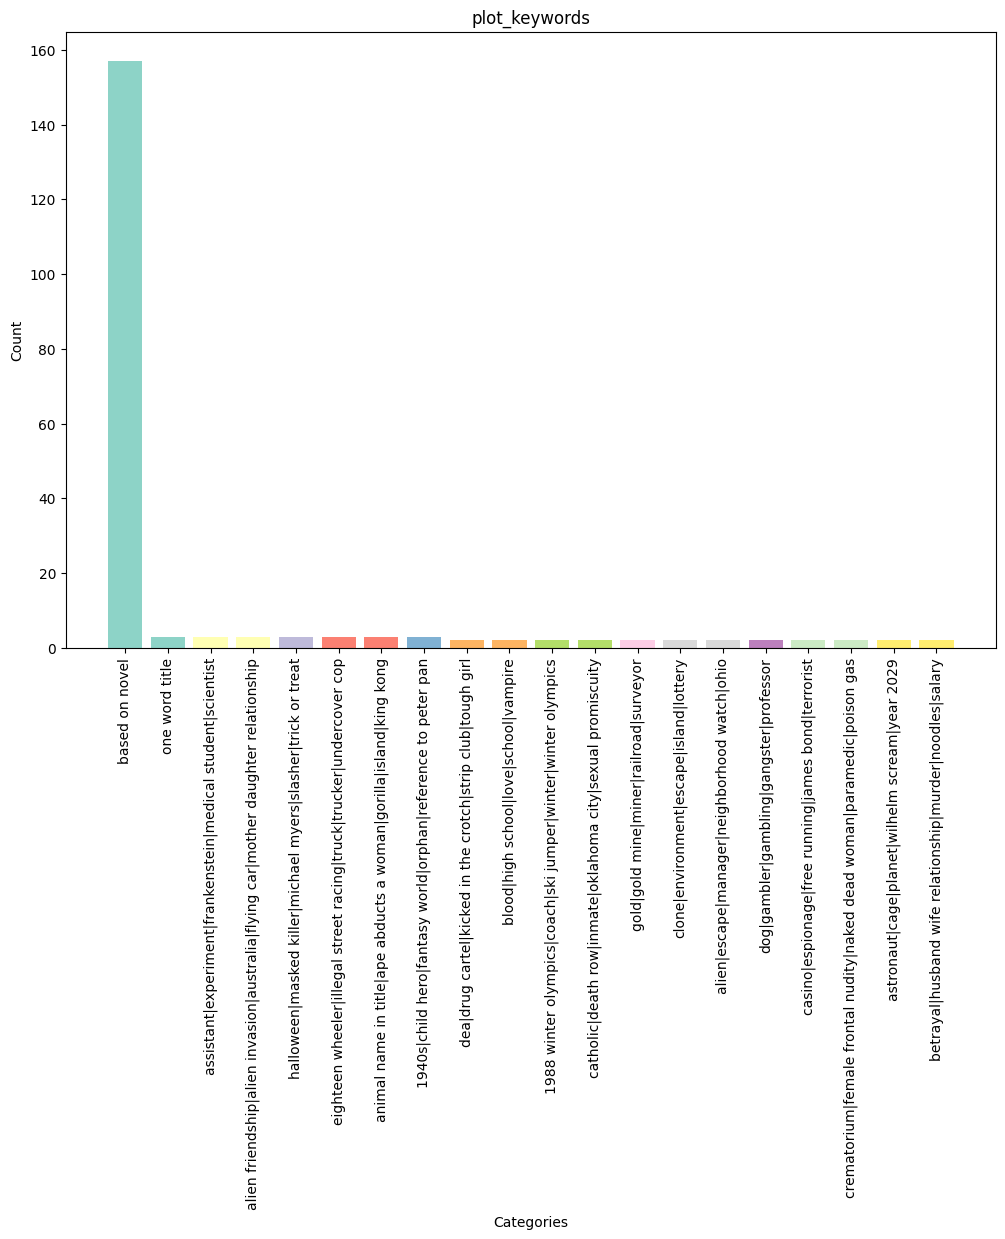

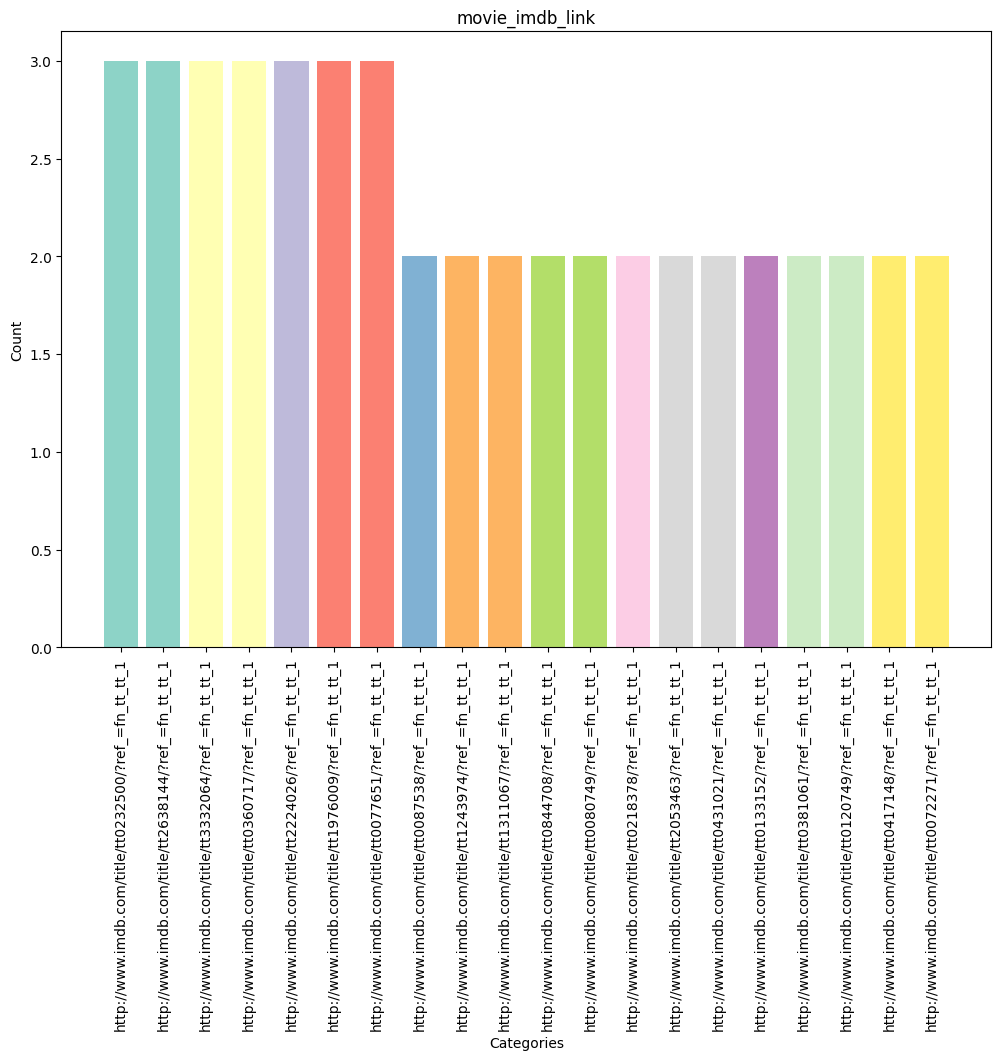

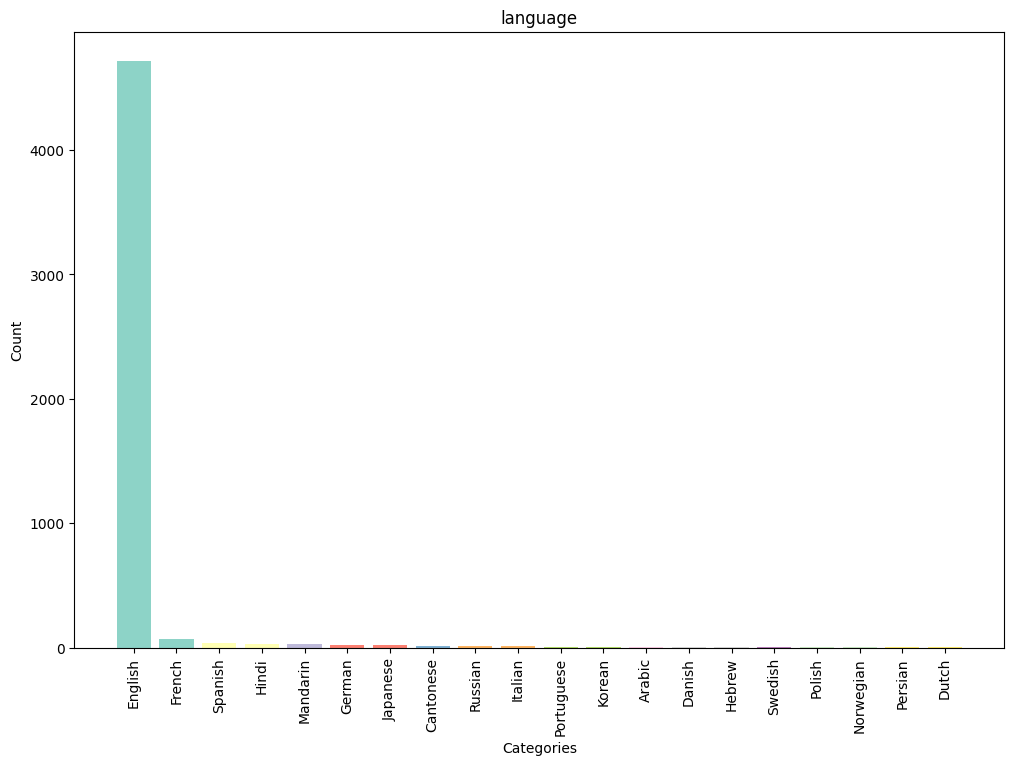

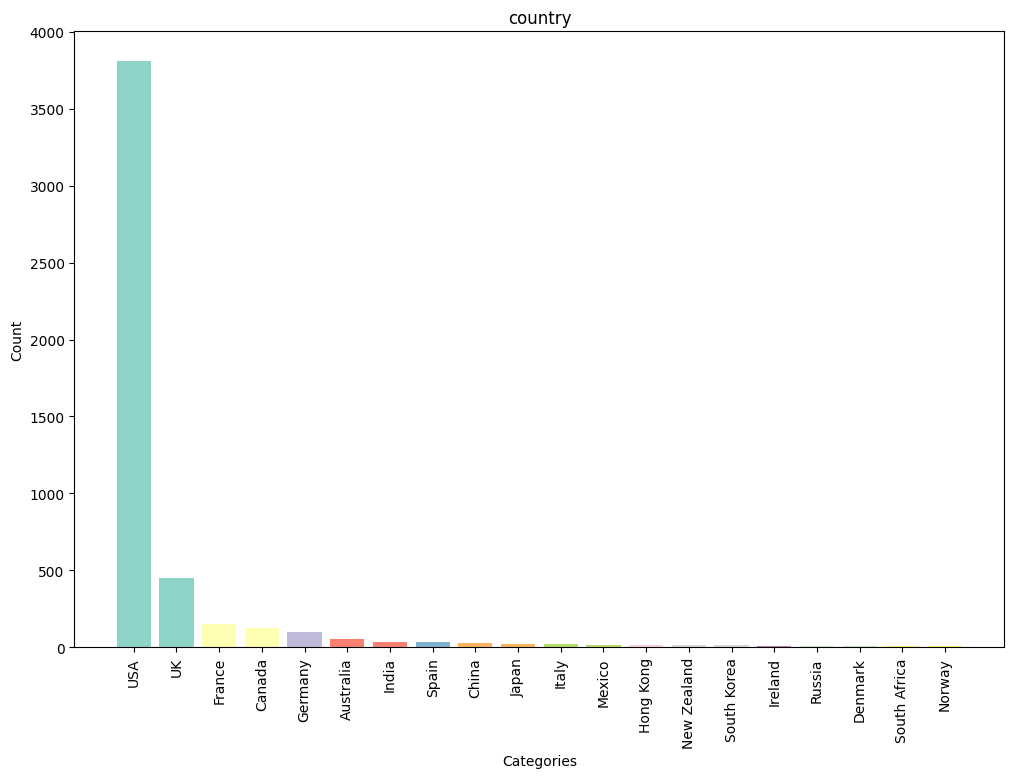

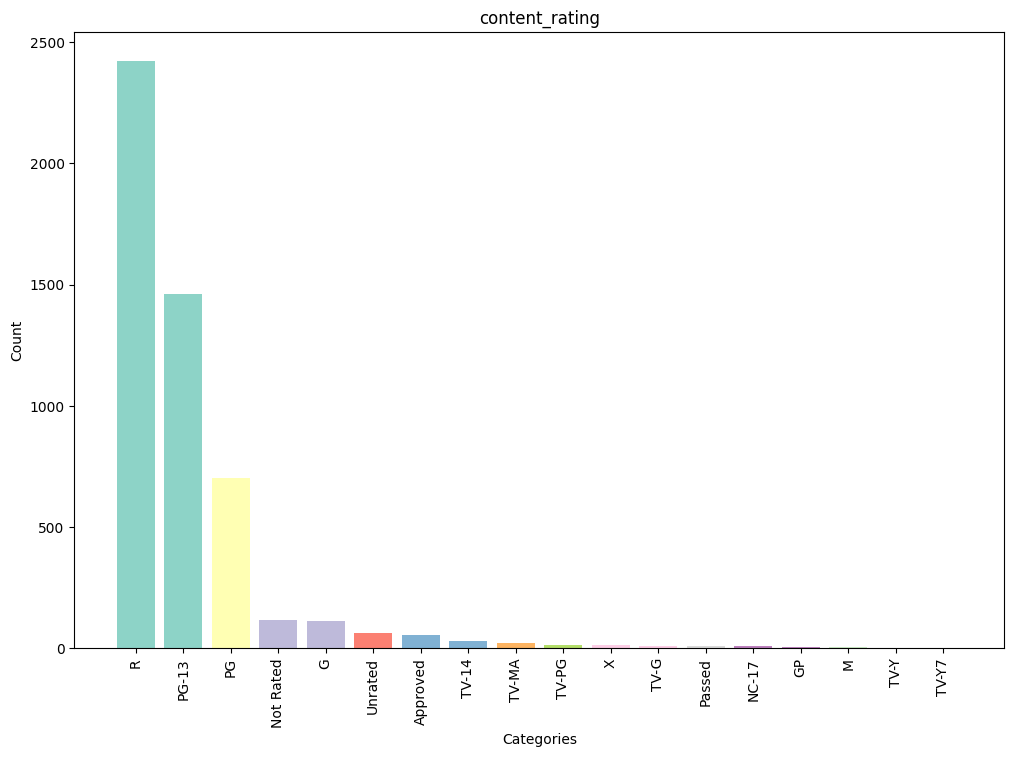

In [28]:
# Lets plot the bar graph for every categorical variable
import matplotlib.pyplot as plt
import numpy as np
# Sample data
for obj_col in object_columns:
    categories = object_columns[obj_col].value_counts().index[:20]
    values = object_columns[obj_col].value_counts().values[:20]
    plt.figure(figsize=(12,8))
    color_scheme = plt.cm.Set3(np.linspace(0, 1, len(categories)))
    # Plotting the bar graph
    plt.bar(categories, values, color=color_scheme)
    
    # Adding labels and title
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.title(obj_col)
    plt.xticks(rotation=90)
    # Displaying the graph
    plt.show()


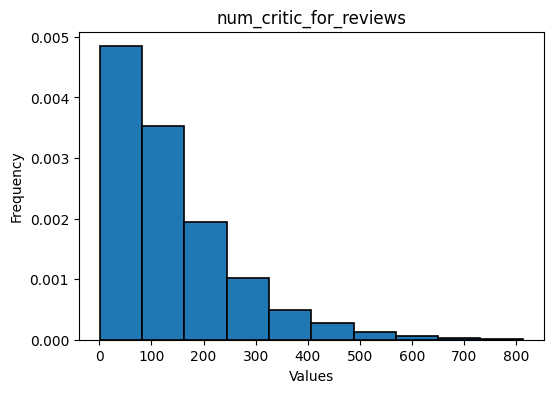

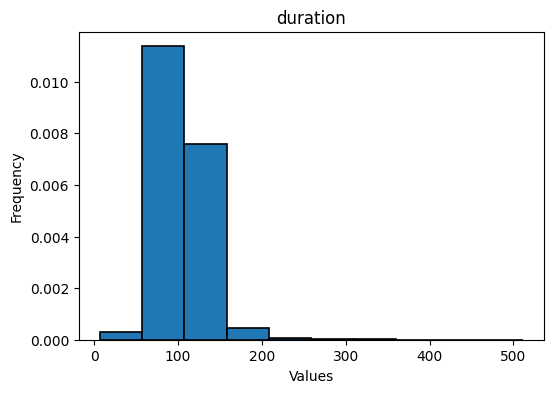

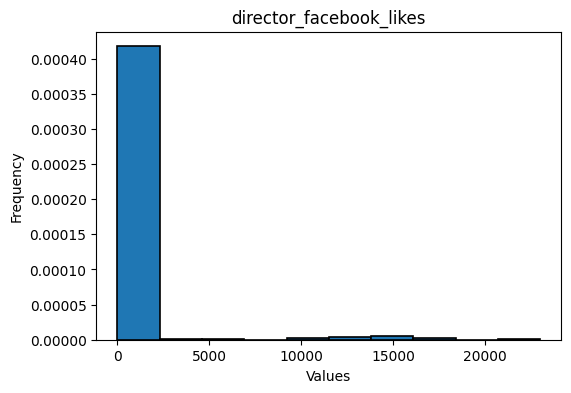

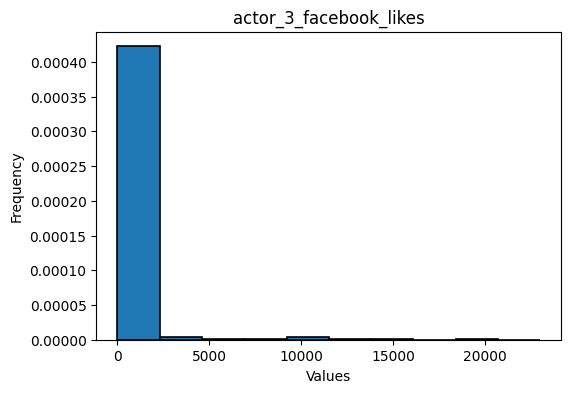

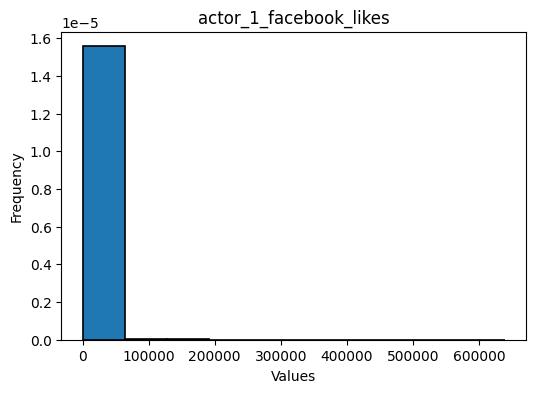

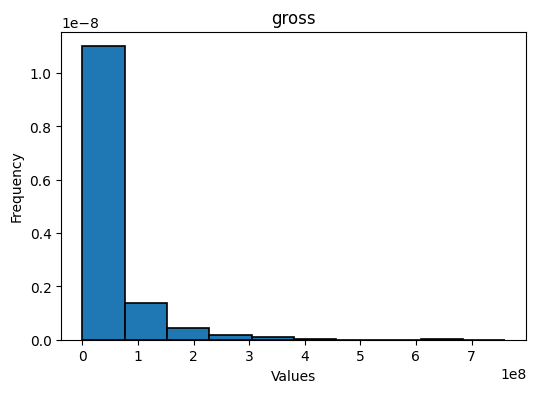

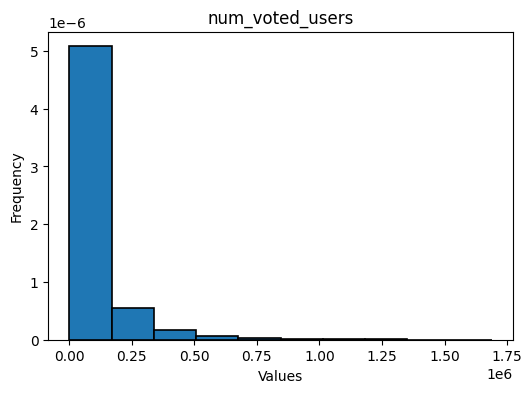

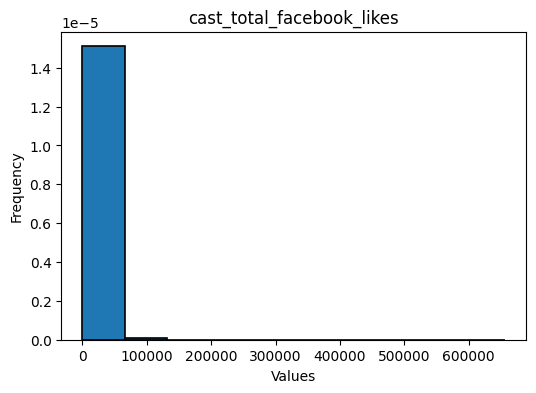

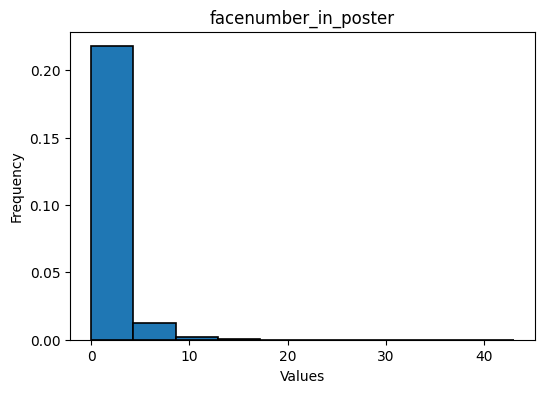

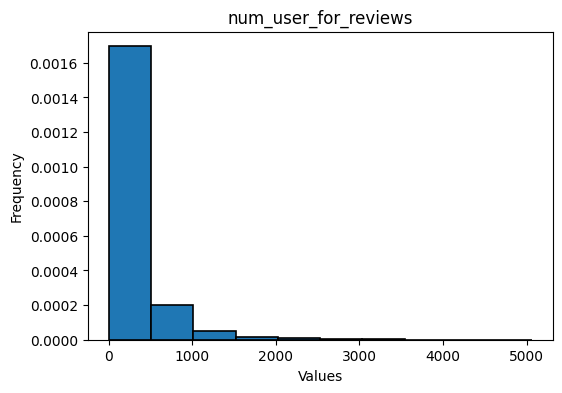

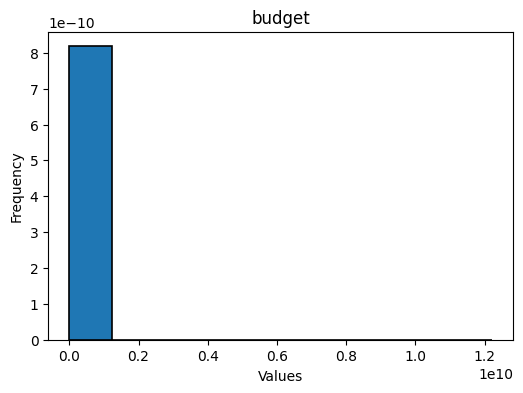

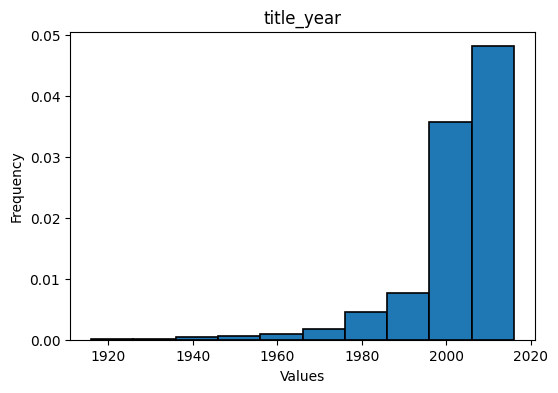

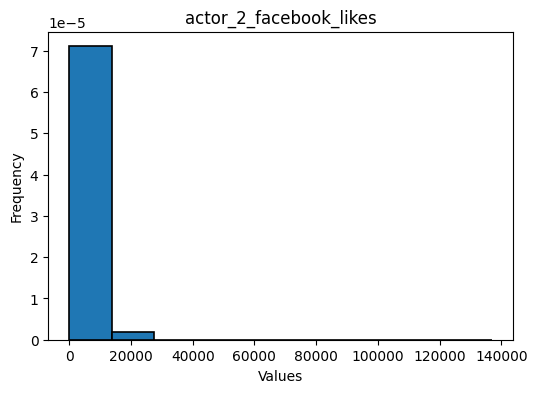

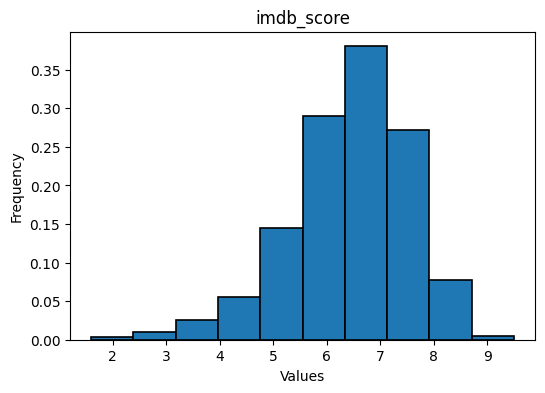

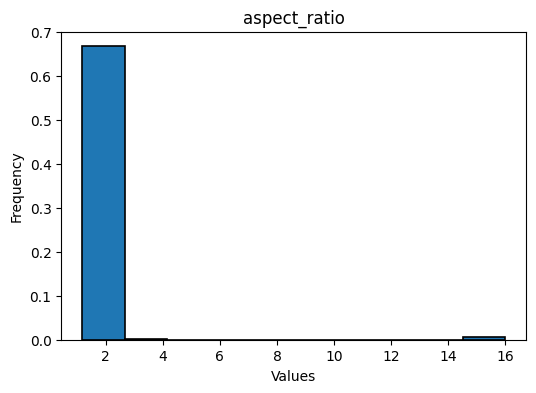

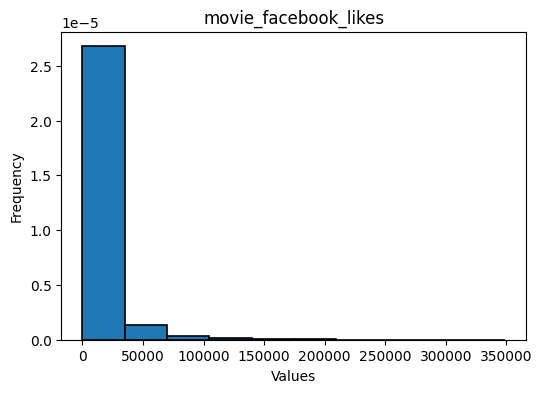

In [39]:
# Lets now plot the distribution of all the numeric data 


# Create subplots with desired sizes


# Plot histograms for each column
for i, column in enumerate(number_df.columns):
    fig, ax = plt.subplots(figsize=(6, 4))  # Adjust the figure size as desired
    ax.hist(number_df[column], bins=10, density=True, edgecolor='black', linewidth=1.2)
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(column)
    plt.show()





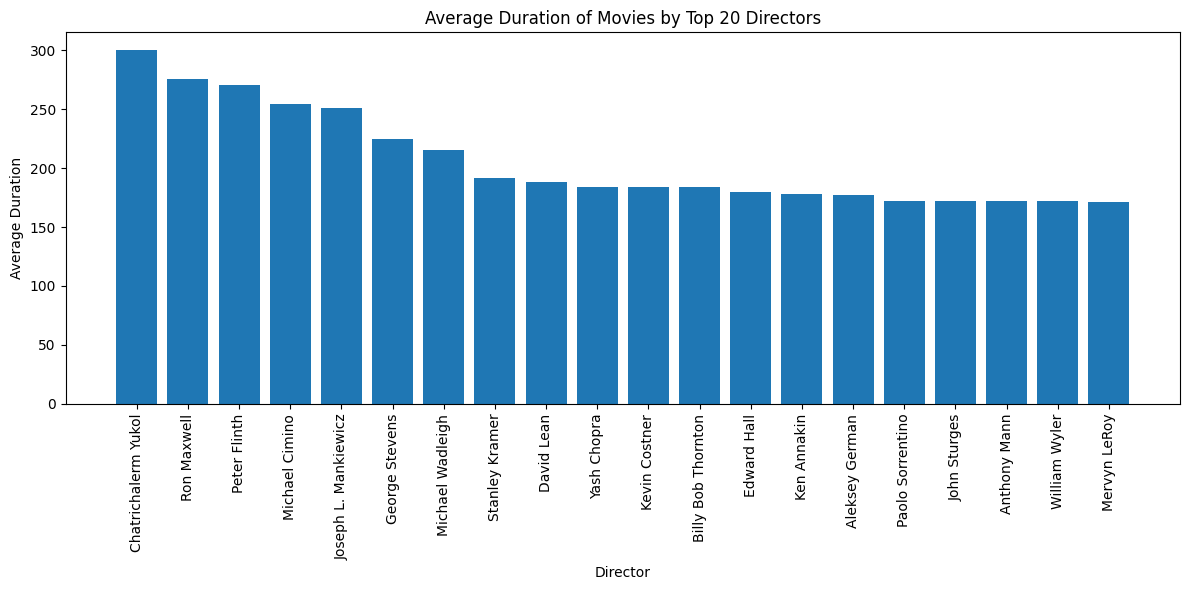

In [40]:
# Lets start the bivariate analysis
# 1. Lets check what is the length of the movies that top directors direct
 
 # Step 1: Calculate average duration for each director
average_duration = data.groupby('director_name')['duration'].mean()

# Step 2: Sort directors based on average duration
sorted_directors = average_duration.sort_values(ascending=False)

# Step 3: Select top 20 directors
top_20_directors = sorted_directors.head(20)

# Step 4: Plot bar graph for average duration of movies by top 20 directors
plt.figure(figsize=(12, 6))
plt.bar(top_20_directors.index, top_20_directors.values)
plt.xlabel('Director')
plt.ylabel('Average Duration')
plt.title('Average Duration of Movies by Top 20 Directors')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

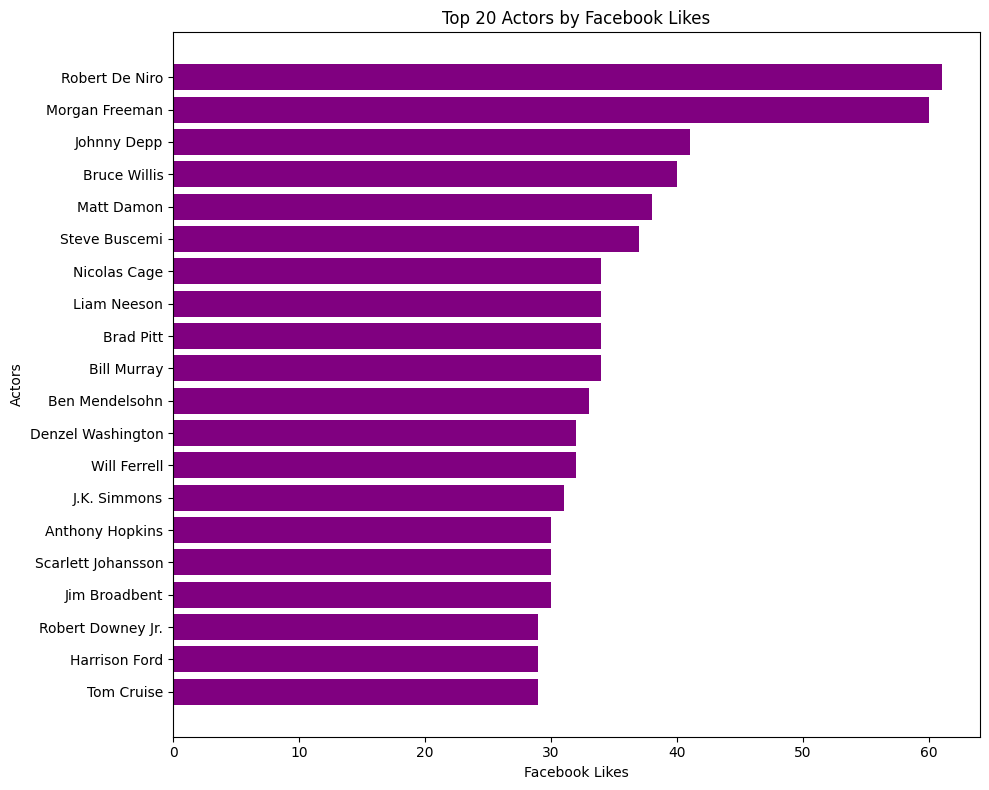

In [41]:
# 2. Lets check top 20 most popular actors
# Concatenate the actor columns
actors = pd.concat([data['actor_1_name'], data['actor_2_name'], data['actor_3_name']])

# Count the Facebook likes for each actor
actor_likes = actors.value_counts()

# Select the top 20 actors by Facebook likes
top_20_actors = actor_likes.head(20)

# Sort the actors by Facebook likes in descending order
top_20_actors = top_20_actors.sort_values(ascending=True)

# Plot the horizontal bar graph
plt.figure(figsize=(10, 8))
plt.barh(top_20_actors.index, top_20_actors.values, color='purple')
plt.xlabel('Facebook Likes')
plt.ylabel('Actors')
plt.title('Top 20 Actors by Facebook Likes')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

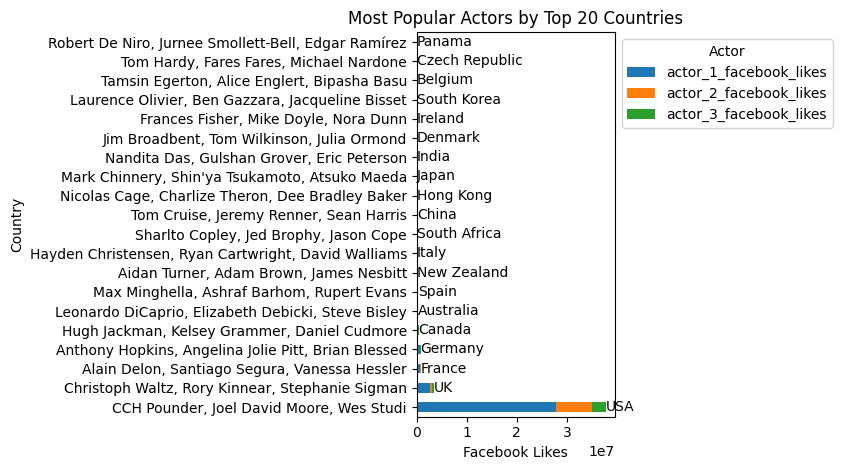

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'data'

# Calculate the total Facebook likes for each actor by country
actor_likes_by_country = data.groupby('country')[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].sum()

# Calculate the total Facebook likes for each country
country_likes = actor_likes_by_country.sum(axis=1)

# Select the top 20 countries by Facebook likes
top_20_countries = country_likes.nlargest(20).index

# Select the data for the top 20 countries
top_20_actors_by_country = actor_likes_by_country.loc[top_20_countries]

# Get the names of the actors for each country
actor_names_by_country = data.groupby('country')[['actor_1_name', 'actor_2_name', 'actor_3_name']].first()

# Select the names for the top 20 countries
top_20_actor_names = actor_names_by_country.loc[top_20_countries]

# Plot the stacked horizontal bar graph
plt.figure(figsize=(12, 8))
top_20_actors_by_country.plot(kind='barh', stacked=True)
plt.xlabel('Facebook Likes')
plt.ylabel('Country')
plt.title('Most Popular Actors by Top 20 Countries')
plt.legend(title='Actor', bbox_to_anchor=(1, 1))
plt.yticks(range(len(top_20_countries)), top_20_actor_names.apply(lambda row: ', '.join(row.dropna()), axis=1))

# Add country labels on top of each bar
for i, country in enumerate(top_20_countries):
    likes = top_20_actors_by_country.loc[country]
    x_pos = likes.sum() + 1000  # Adjust the position of the label
    plt.text(x_pos, i, country, ha='left', va='center')

plt.tight_layout()
plt.show()


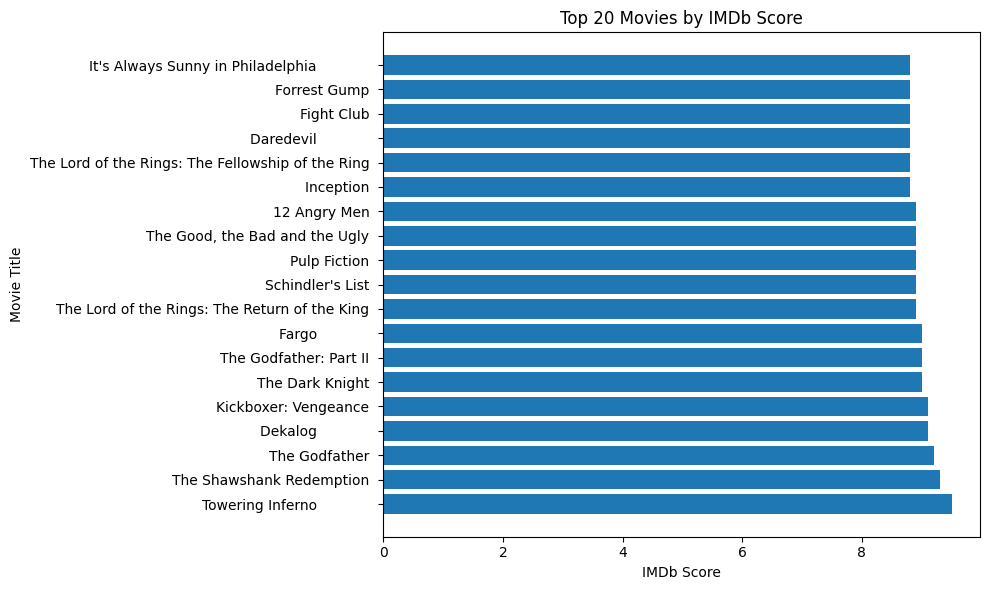

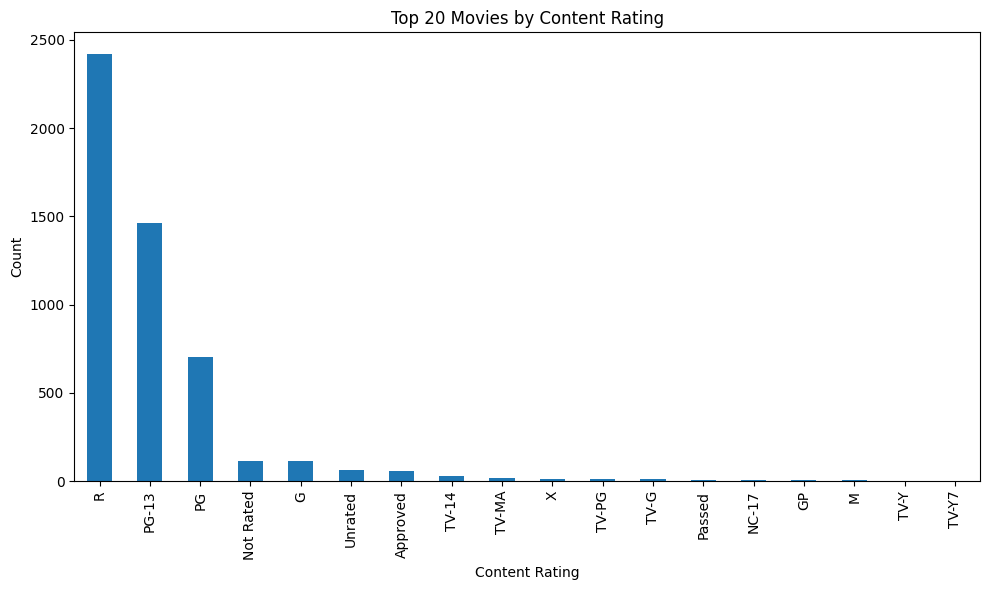

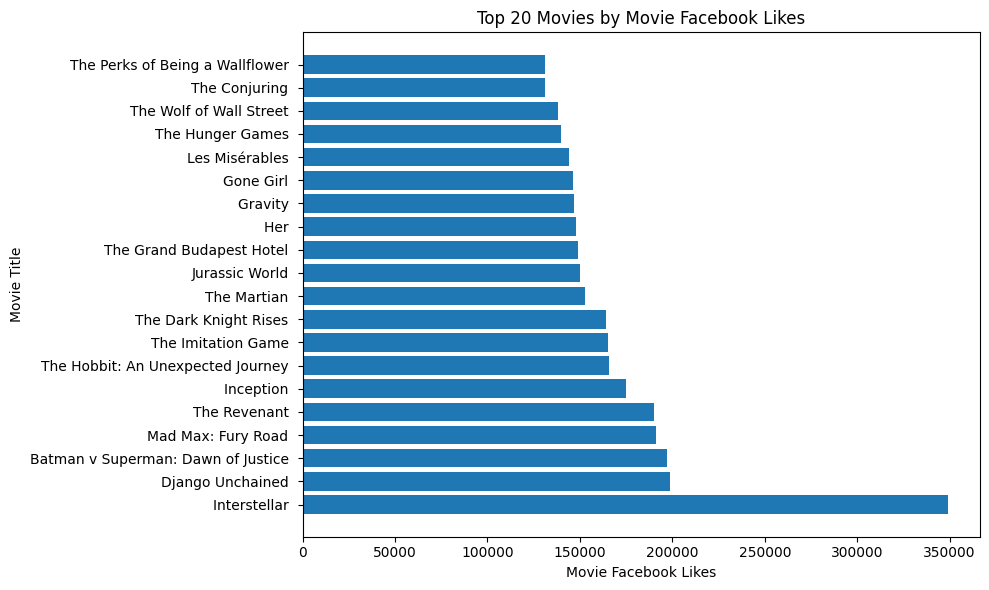

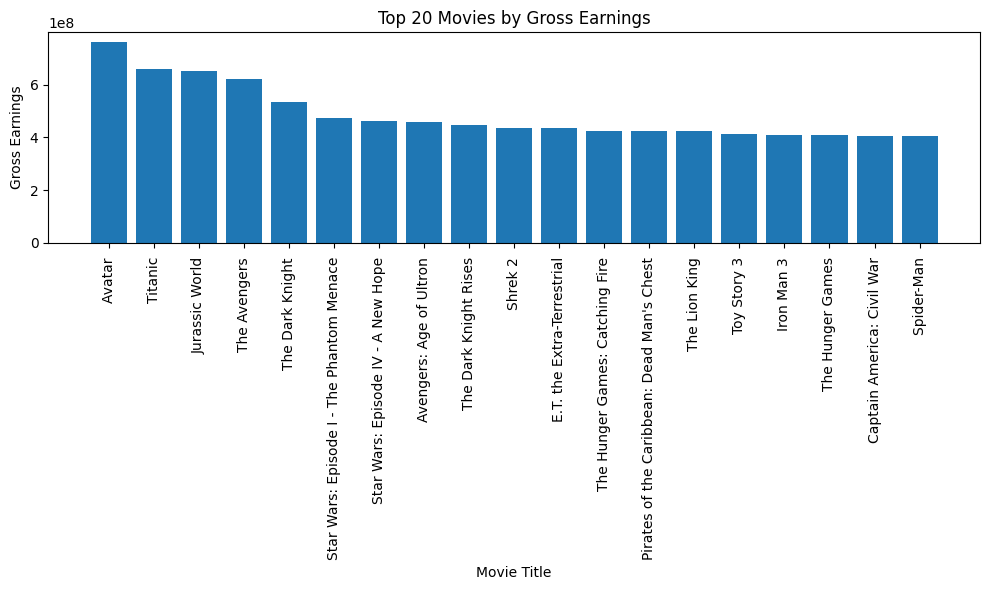

In [48]:

# Top 20 Movies by IMDb Score
top_20_imdb = data.nlargest(20, 'imdb_score')
plt.figure(figsize=(10, 6))
plt.barh(top_20_imdb['movie_title'], top_20_imdb['imdb_score'])
plt.xlabel('IMDb Score')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies by IMDb Score')
plt.tight_layout()
plt.show()

# Top 20 Movies by Content Rating
top_20_content_rating = data['content_rating'].value_counts().nlargest(20)
plt.figure(figsize=(10, 6))
top_20_content_rating.plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Top 20 Movies by Content Rating')
plt.tight_layout()
plt.show()

# Top 20 Movies by Movie Facebook Likes
top_20_facebook_likes = data.nlargest(20, 'movie_facebook_likes')
plt.figure(figsize=(10, 6))
plt.barh(top_20_facebook_likes['movie_title'], top_20_facebook_likes['movie_facebook_likes'])
plt.xlabel('Movie Facebook Likes')
plt.ylabel('Movie Title')
plt.title('Top 20 Movies by Movie Facebook Likes')
plt.tight_layout()
plt.show()

# Top 20 Movies by Gross
top_20_gross = data.nlargest(20, 'gross')
plt.figure(figsize=(10, 6))
plt.bar(top_20_gross['movie_title'], top_20_gross['gross'])
plt.xlabel('Movie Title')
plt.ylabel('Gross Earnings')
plt.xticks(rotation=90)
plt.title('Top 20 Movies by Gross Earnings')
plt.tight_layout()
plt.show()

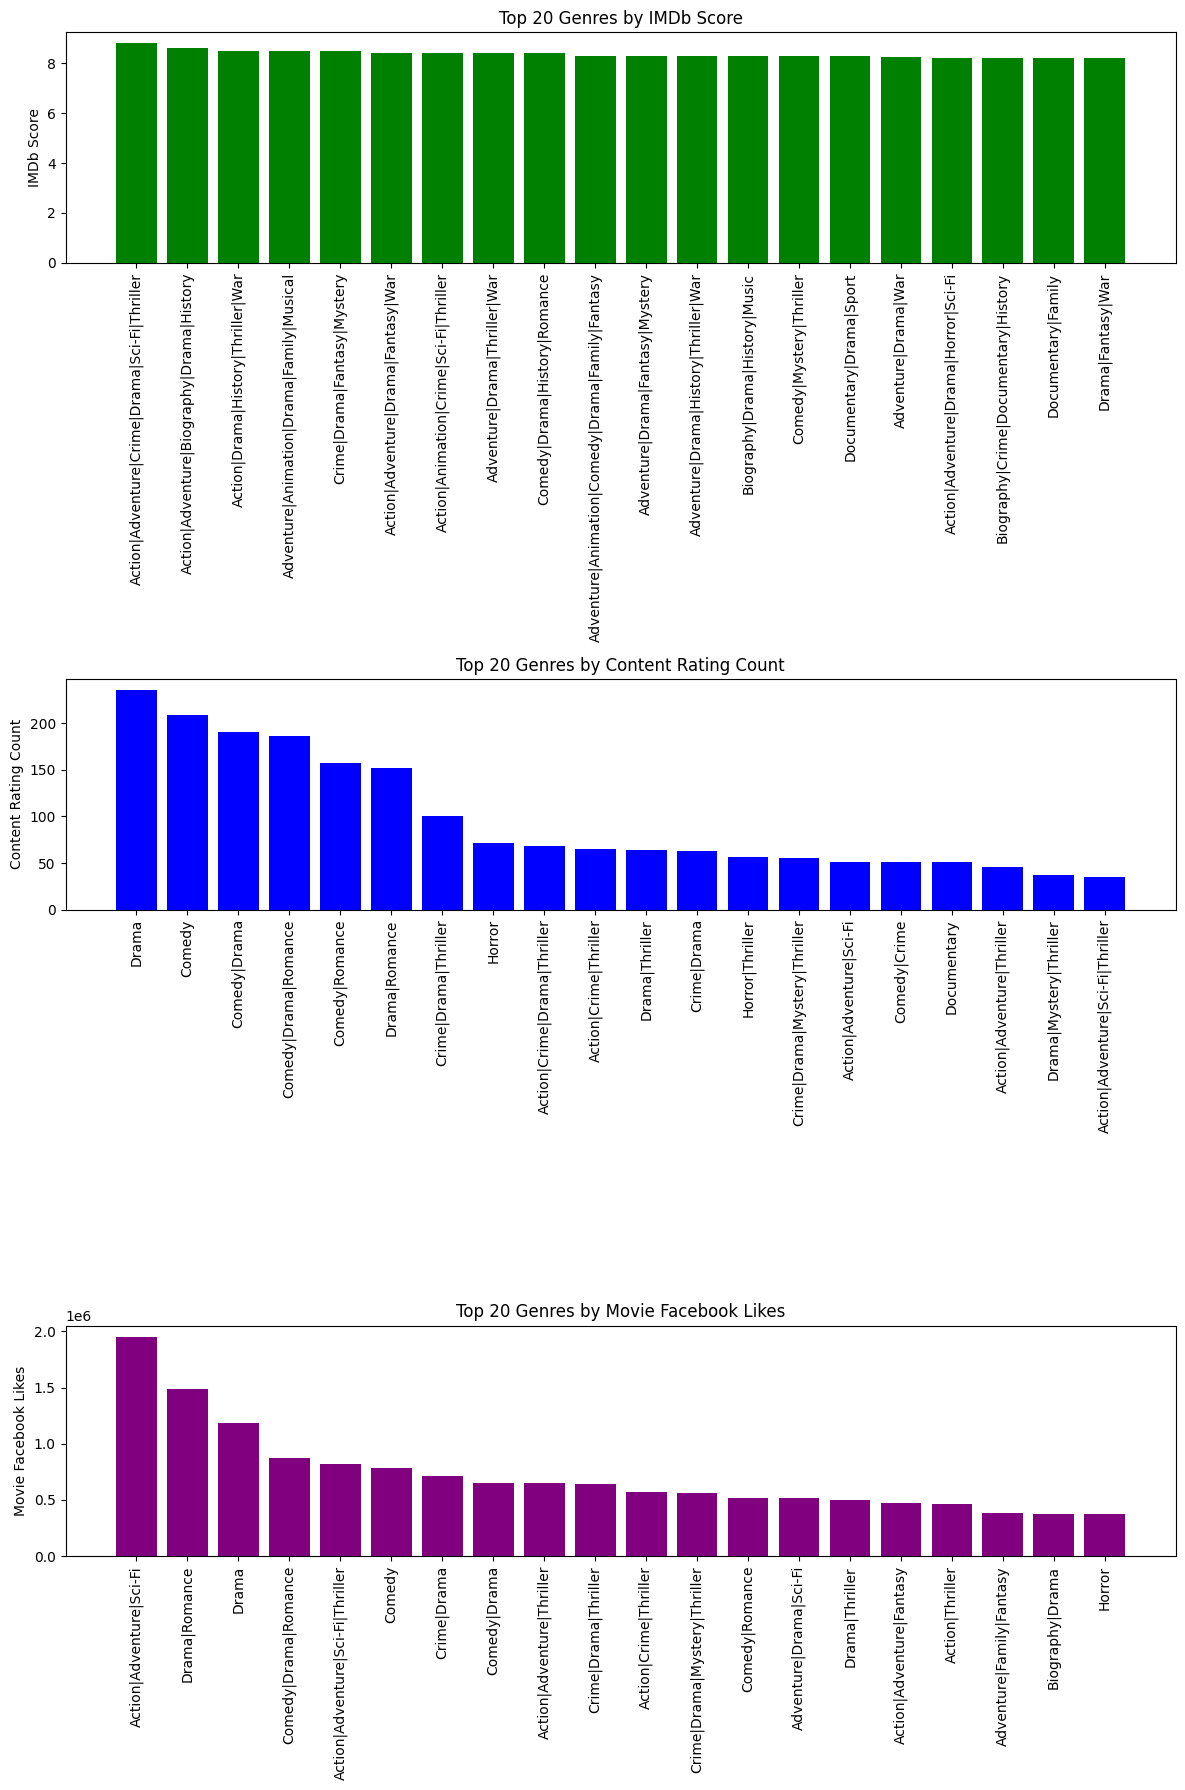

In [49]:
# Calculate the average IMDb score, content rating count, and movie Facebook likes by genre
genre_stats = data.groupby('genres').agg({'imdb_score': 'mean',
                                          'content_rating': 'count',
                                          'movie_facebook_likes': 'sum'})

# Select the top 20 genres by IMDb score
top_20_imdb_genres = genre_stats.nlargest(20, 'imdb_score')

# Select the top 20 genres by content rating count
top_20_content_rating_genres = genre_stats.nlargest(20, 'content_rating')

# Select the top 20 genres by movie Facebook likes
top_20_facebook_likes_genres = genre_stats.nlargest(20, 'movie_facebook_likes')

# Plotting options
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot for top 20 genres by IMDb score
axes[0].bar(top_20_imdb_genres.index, top_20_imdb_genres['imdb_score'], color='green')
axes[0].set_ylabel('IMDb Score')
axes[0].set_title('Top 20 Genres by IMDb Score')

# Plot for top 20 genres by content rating count
axes[1].bar(top_20_content_rating_genres.index, top_20_content_rating_genres['content_rating'], color='blue')
axes[1].set_ylabel('Content Rating Count')
axes[1].set_title('Top 20 Genres by Content Rating Count')

# Plot for top 20 genres by movie Facebook likes
axes[2].bar(top_20_facebook_likes_genres.index, top_20_facebook_likes_genres['movie_facebook_likes'], color='purple')
axes[2].set_ylabel('Movie Facebook Likes')
axes[2].set_title('Top 20 Genres by Movie Facebook Likes')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=90)

# Display the plots
plt.tight_layout()
plt.show()

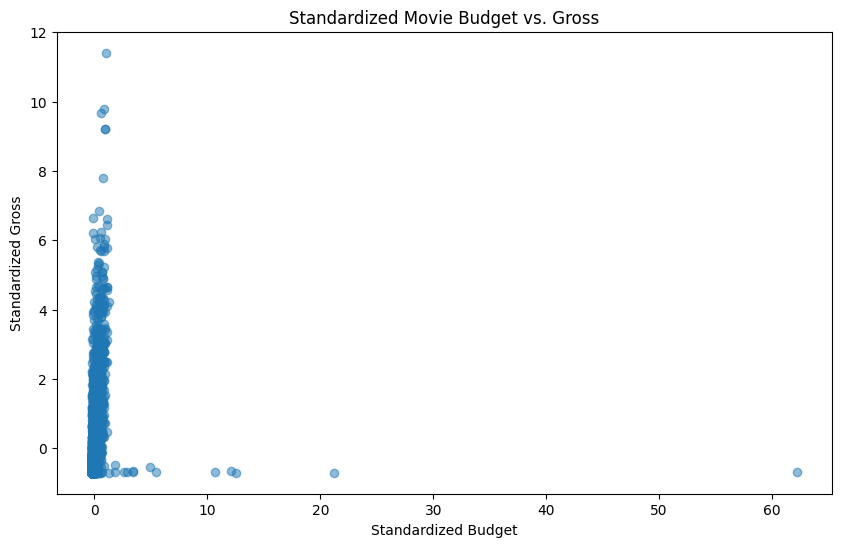

In [56]:
from sklearn.preprocessing import StandardScaler
# Select the movies with non-null budget and gross values
movies = data.dropna(subset=['budget', 'gross'])

# Extract the budget and gross values
budget = movies['budget']
gross = movies['gross']

# Standardize the variables
scaler = StandardScaler()
budget_scaled = scaler.fit_transform(budget.values.reshape(-1, 1))
gross_scaled = scaler.fit_transform(gross.values.reshape(-1, 1))

# Create a scatter plot with standardized variables
plt.figure(figsize=(10, 6))
plt.scatter(budget_scaled, gross_scaled, alpha=0.5)
plt.xlabel('Standardized Budget')
plt.ylabel('Standardized Gross')
plt.title('Standardized Movie Budget vs. Gross')
plt.show()

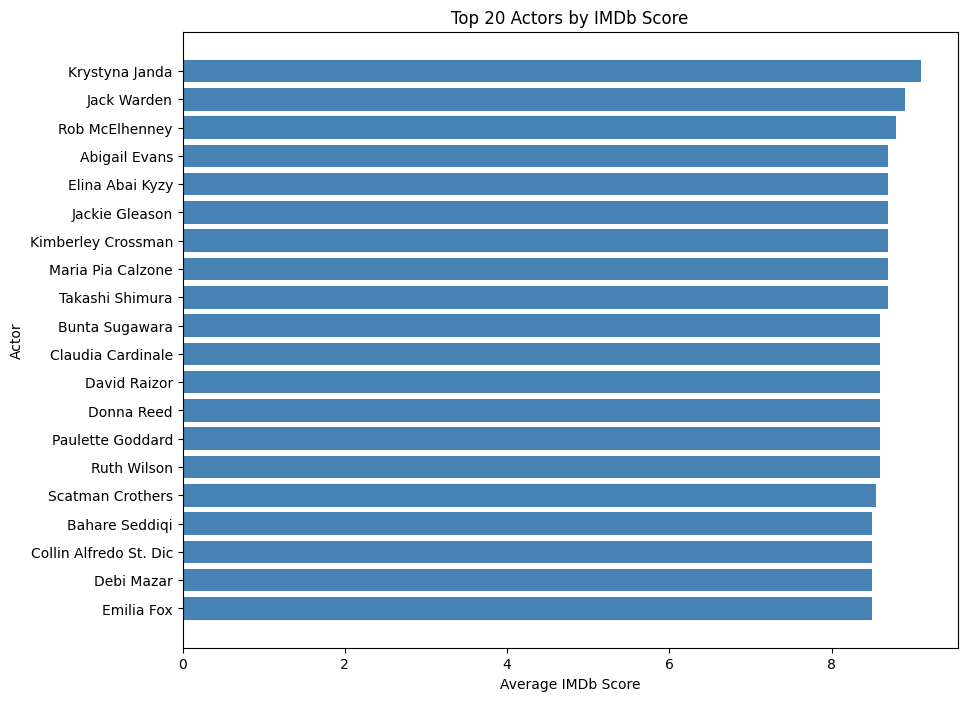

In [61]:
# Select the top 20 actors based on their average IMDb score
top_20_actors = data.groupby('actor_1_name').mean().nlargest(20, 'imdb_score')

# Extract the relevant data for visualization
actors = top_20_actors.index
imdb_scores = top_20_actors['imdb_score']

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(actors, imdb_scores, color='steelblue')
plt.xlabel('Average IMDb Score')
plt.ylabel('Actor')
plt.title('Top 20 Actors by IMDb Score')
plt.gca().invert_yaxis()
plt.show()

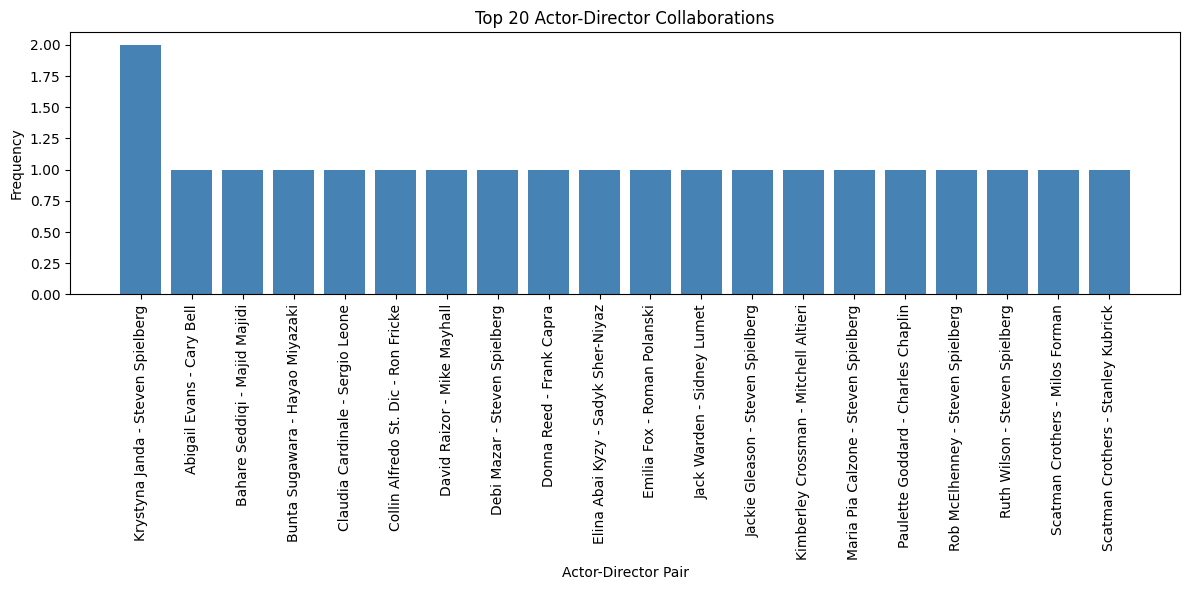

In [62]:
# Select the top 20 actors based on their average IMDb score
top_20_actors = data.groupby('actor_1_name').mean().nlargest(20, 'imdb_score')

# Filter the data for the top 20 actors
filtered_data = data[data['actor_1_name'].isin(top_20_actors.index)]

# Group the data by actor-director pairs and calculate the frequency
actor_director_pairs = filtered_data.groupby(['actor_1_name', 'director_name']).size().nlargest(20)

# Extract the actor and director names for visualization
actors = [pair[0] for pair in actor_director_pairs.index]
directors = [pair[1] for pair in actor_director_pairs.index]
frequencies = actor_director_pairs.values

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(actors)), frequencies, color='steelblue')
plt.xlabel('Actor-Director Pair')
plt.ylabel('Frequency')
plt.title('Top 20 Actor-Director Collaborations')
plt.xticks(range(len(actors)), [f'{actors[i]} - {directors[i]}' for i in range(len(actors))], rotation='vertical')
plt.tight_layout()
plt.show()

C:\Users\naman\AppData\Local\Temp\ipykernel_1428\1856025664.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3', len(genres))


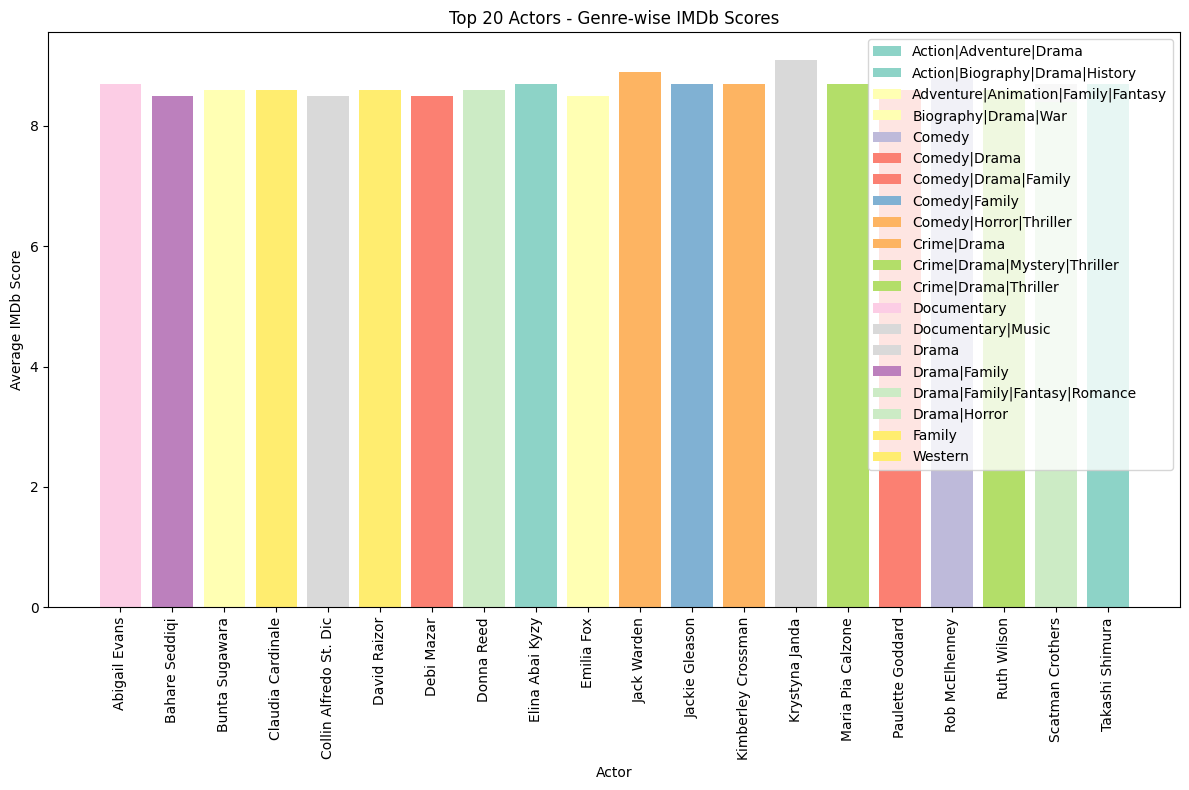

In [64]:
# Select the top 20 actors based on their average IMDb score
top_20_actors = data.groupby('actor_1_name').mean().nlargest(20, 'imdb_score')

# Filter the data for the top 20 actors
filtered_data = data[data['actor_1_name'].isin(top_20_actors.index)]

# Calculate the average IMDb score for each actor-genre pair
actor_genre_scores = filtered_data.groupby(['actor_1_name', 'genres'])['imdb_score'].mean().unstack()

# Get the list of actors and genres
actors = actor_genre_scores.index
genres = actor_genre_scores.columns

# Set up the bar chart
num_actors = len(actors)
bar_width = 0.8
index = np.arange(num_actors)
colors = plt.cm.get_cmap('Set3', len(genres))

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
for i, genre in enumerate(genres):
    genre_scores = actor_genre_scores[genre]
    plt.bar(index, genre_scores, bar_width, label=genre, color=colors(i))

plt.xlabel('Actor')
plt.ylabel('Average IMDb Score')
plt.title('Top 20 Actors - Genre-wise IMDb Scores')
plt.xticks(index, actors, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()

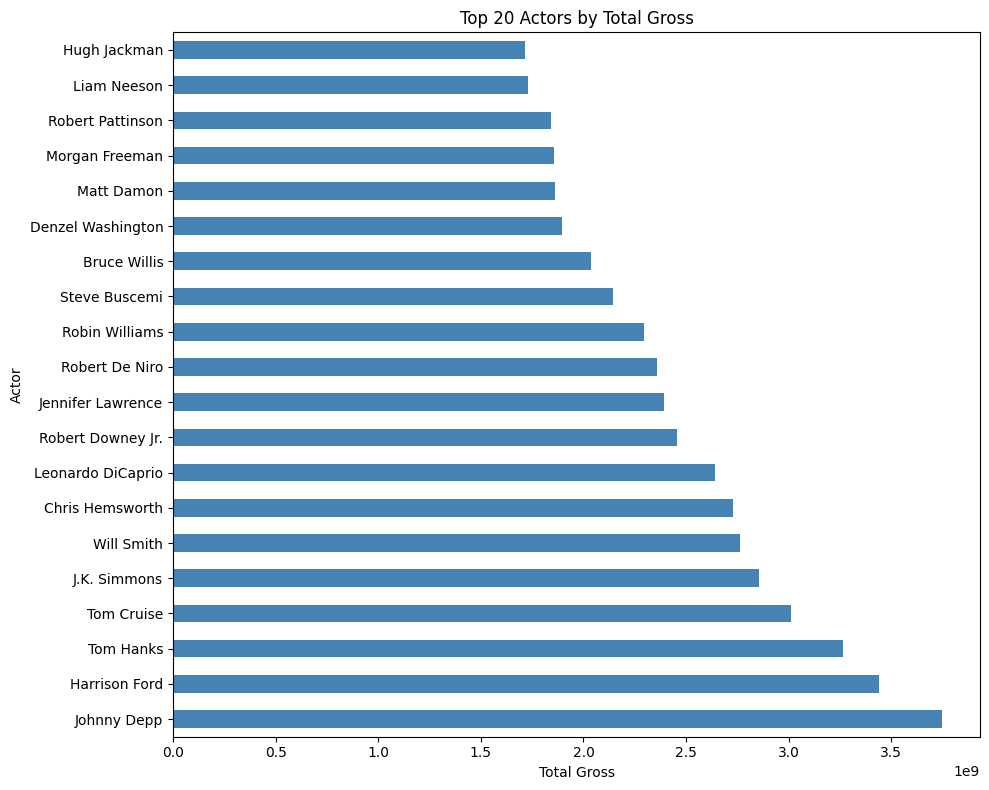

In [65]:
# Calculate the total gross for each actor
actor_gross = data.groupby('actor_1_name')['gross'].sum().nlargest(20)

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
actor_gross.plot(kind='barh', color='steelblue')
plt.xlabel('Total Gross')
plt.ylabel('Actor')
plt.title('Top 20 Actors by Total Gross')
plt.tight_layout()
plt.show()

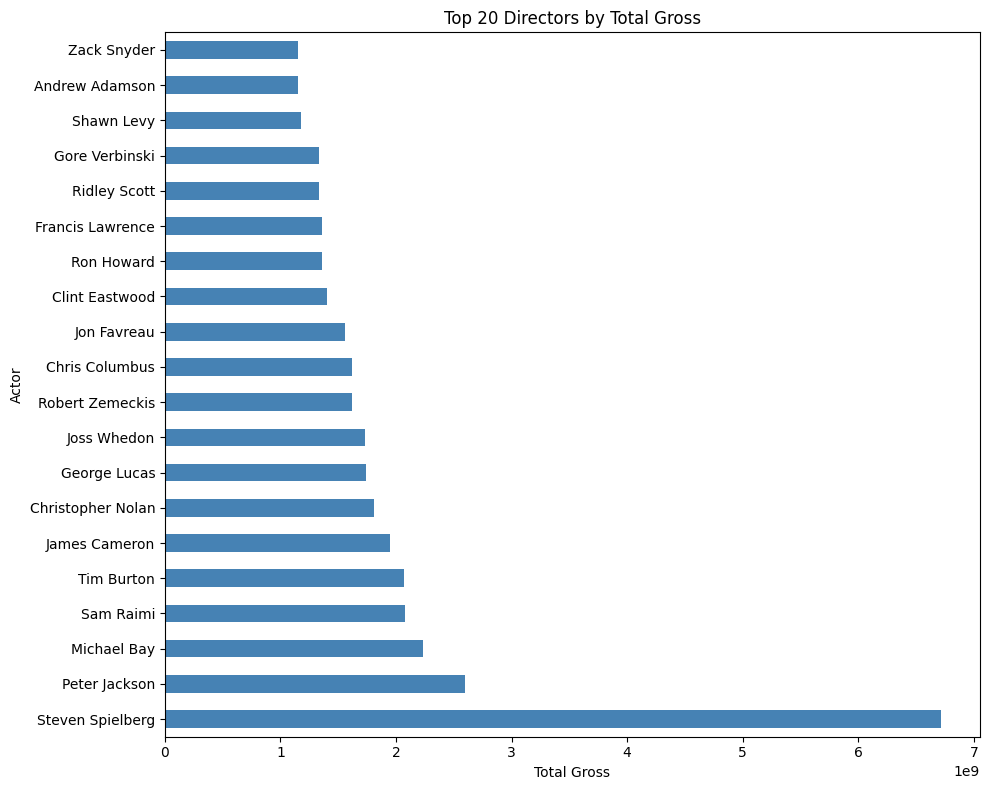

In [67]:
# Calculate the total gross for each director
actor_gross = data.groupby('director_name')['gross'].sum().nlargest(20)

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
actor_gross.plot(kind='barh', color='steelblue')
plt.xlabel('Total Gross')
plt.ylabel('Actor')
plt.title('Top 20 Directors by Total Gross')
plt.tight_layout()
plt.show()